In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import shutil
# Corn
source_dir = "/kaggle/input/plantvillage-dataset/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot"
destination_dir = "/kaggle/working/Gray_leaf_spot"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Corn_(maize)___Common_rust_"
destination_dir = "/kaggle/working/Common_rust"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Corn_(maize)___Northern_Leaf_Blight"
destination_dir = "/kaggle/working/Northern_Leaf_Blight"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Corn_(maize)___healthy"
destination_dir = "/kaggle/working/healthy"
shutil.copytree(source_dir, destination_dir)

# Tomato
source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Bacterial_spot"
destination_dir = "/kaggle/working/Tomato___Bacterial_spot"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Early_blight"
destination_dir = "/kaggle/working/Tomato___Early_blight"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Late_blight"
destination_dir = "/kaggle/working/Tomato___Late_blight"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Leaf_Mold"
destination_dir = "/kaggle/working/Tomato___Leaf_Mold"
shutil.copytree(source_dir, destination_dir)

# Tomato
source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Septoria_leaf_spot"
destination_dir = "/kaggle/working/Tomato___Septoria_leaf_spot"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Spider_mites Two-spotted_spider_mite"
destination_dir = "/kaggle/working/Tomato___Spider_mites Two-spotted_spider_mite"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Target_Spot"
destination_dir = "/kaggle/working/Tomato___Target_Spot"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus"
destination_dir = "/kaggle/working/Tomato___Tomato_Yellow_Leaf_Curl_Virus"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___Tomato_mosaic_virus"
destination_dir = "/kaggle/working/Tomato___Tomato_mosaic_virus"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Tomato___healthy"
destination_dir = "/kaggle/working/Tomato___healthy"
shutil.copytree(source_dir, destination_dir)

# Apple
source_dir = "/kaggle/input/plantvillage-dataset/color/Apple___Apple_scab"
destination_dir = "/kaggle/working/Apple___Apple_scab"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Apple___Black_rot"
destination_dir = "/kaggle/working/Apple___Black_rot"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Apple___Cedar_apple_rust"
destination_dir = "/kaggle/working/Apple___Cedar_apple_rust"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Apple___healthy"
destination_dir = "/kaggle/working/Apple___healthy"
shutil.copytree(source_dir, destination_dir)

# Potato
source_dir = "/kaggle/input/plantvillage-dataset/color/Potato___Early_blight"
destination_dir = "/kaggle/working/Potato___Early_blight"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Potato___Late_blight"
destination_dir = "/kaggle/working/Potato___Late_blight"
shutil.copytree(source_dir, destination_dir)

source_dir = "/kaggle/input/plantvillage-dataset/color/Potato___healthy"
destination_dir = "/kaggle/working/Potato___healthy"
shutil.copytree(source_dir, destination_dir)


In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report 

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers
import keras
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical, plot_model
import imgaug.augmenters as iaa

In [2]:
data_path = '/kaggle/working/'

In [3]:
classes = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

print("Dataset Classes:")
for cls in classes:
    print(cls)

Dataset Classes:
Apple___Apple_scab
Tomato___Target_Spot
Tomato___Late_blight
Potato___healthy
.virtual_documents
Potato___Early_blight
Apple___Cedar_apple_rust
Northern_Leaf_Blight
Apple___healthy
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___healthy
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Early_blight
Common_rust
Gray_leaf_spot
Tomato___Septoria_leaf_spot
Tomato___Leaf_Mold
Potato___Late_blight
Apple___Black_rot
healthy
Tomato___Bacterial_spot
Tomato___Tomato_mosaic_virus


#### Here,labels are the folder name and data images are inside the respective folder. Lets create a dataframe for the filepath and labels

In [4]:
def create_dataframe(data_path):
    filepaths = []
    labels = []

    for fold in os.listdir(data_path):
        f_path = os.path.join(data_path, fold)
        if os.path.isdir(f_path):
            imgs = os.listdir(f_path)
            for img in imgs:
                img_path = os.path.join(f_path, img)
                filepaths.append(img_path)
                labels.append(fold)

    fseries = pd.Series(filepaths, name='Filepaths')
    lseries = pd.Series(labels, name='Labels')
    return pd.concat([fseries, lseries], axis=1)

# Create DataFrame for the dataset
df = create_dataframe(data_path)

In [5]:
df

,Filepaths,Labels
0,/kaggle/working/Apple___Apple_scab/9f76829c-65...,Apple___Apple_scab
1,/kaggle/working/Apple___Apple_scab/84ef6106-d4...,Apple___Apple_scab
2,/kaggle/working/Apple___Apple_scab/2438c1f0-55...,Apple___Apple_scab
3,/kaggle/working/Apple___Apple_scab/9431682d-6d...,Apple___Apple_scab
4,/kaggle/working/Apple___Apple_scab/6cee3edf-89...,Apple___Apple_scab
...,...,...
27330,/kaggle/working/Tomato___Tomato_mosaic_virus/0...,Tomato___Tomato_mosaic_virus
27331,/kaggle/working/Tomato___Tomato_mosaic_virus/e...,Tomato___Tomato_mosaic_virus
27332,/kaggle/working/Tomato___Tomato_mosaic_virus/0...,Tomato___Tomato_mosaic_virus
27333,/kaggle/working/Tomato___Tomato_mosaic_virus/6...,Tomato___Tomato_mosaic_virus


### Splitting data into training, testing and validation sets

In [6]:
 # Step 1: Split into 70% training and 30% dummy
train_df, dummy_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=42)

# Step 2: Split dummy_df into 20% testing and 10% validation
test_df, valid_df = train_test_split(dummy_df, train_size=2/3, shuffle=True, random_state=42)

In [7]:
print(train_df.shape)
print(dummy_df.shape)
print(valid_df.shape)
print(test_df.shape)

(19134, 2)
(8201, 2)
(2734, 2)
(5467, 2)


### Data Augmentation

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test data generators remain the same
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 19134 validated image filenames belonging to 21 classes.
Found 2734 validated image filenames belonging to 21 classes.
Found 5467 validated image filenames belonging to 21 classes.


In [10]:
print(f'Training samples: {train_generator.samples}')
print(f'Validation samples: {valid_generator.samples}')
print(f'Test samples: {test_generator.samples}')

Training samples: 19134
Validation samples: 2734
Test samples: 5467


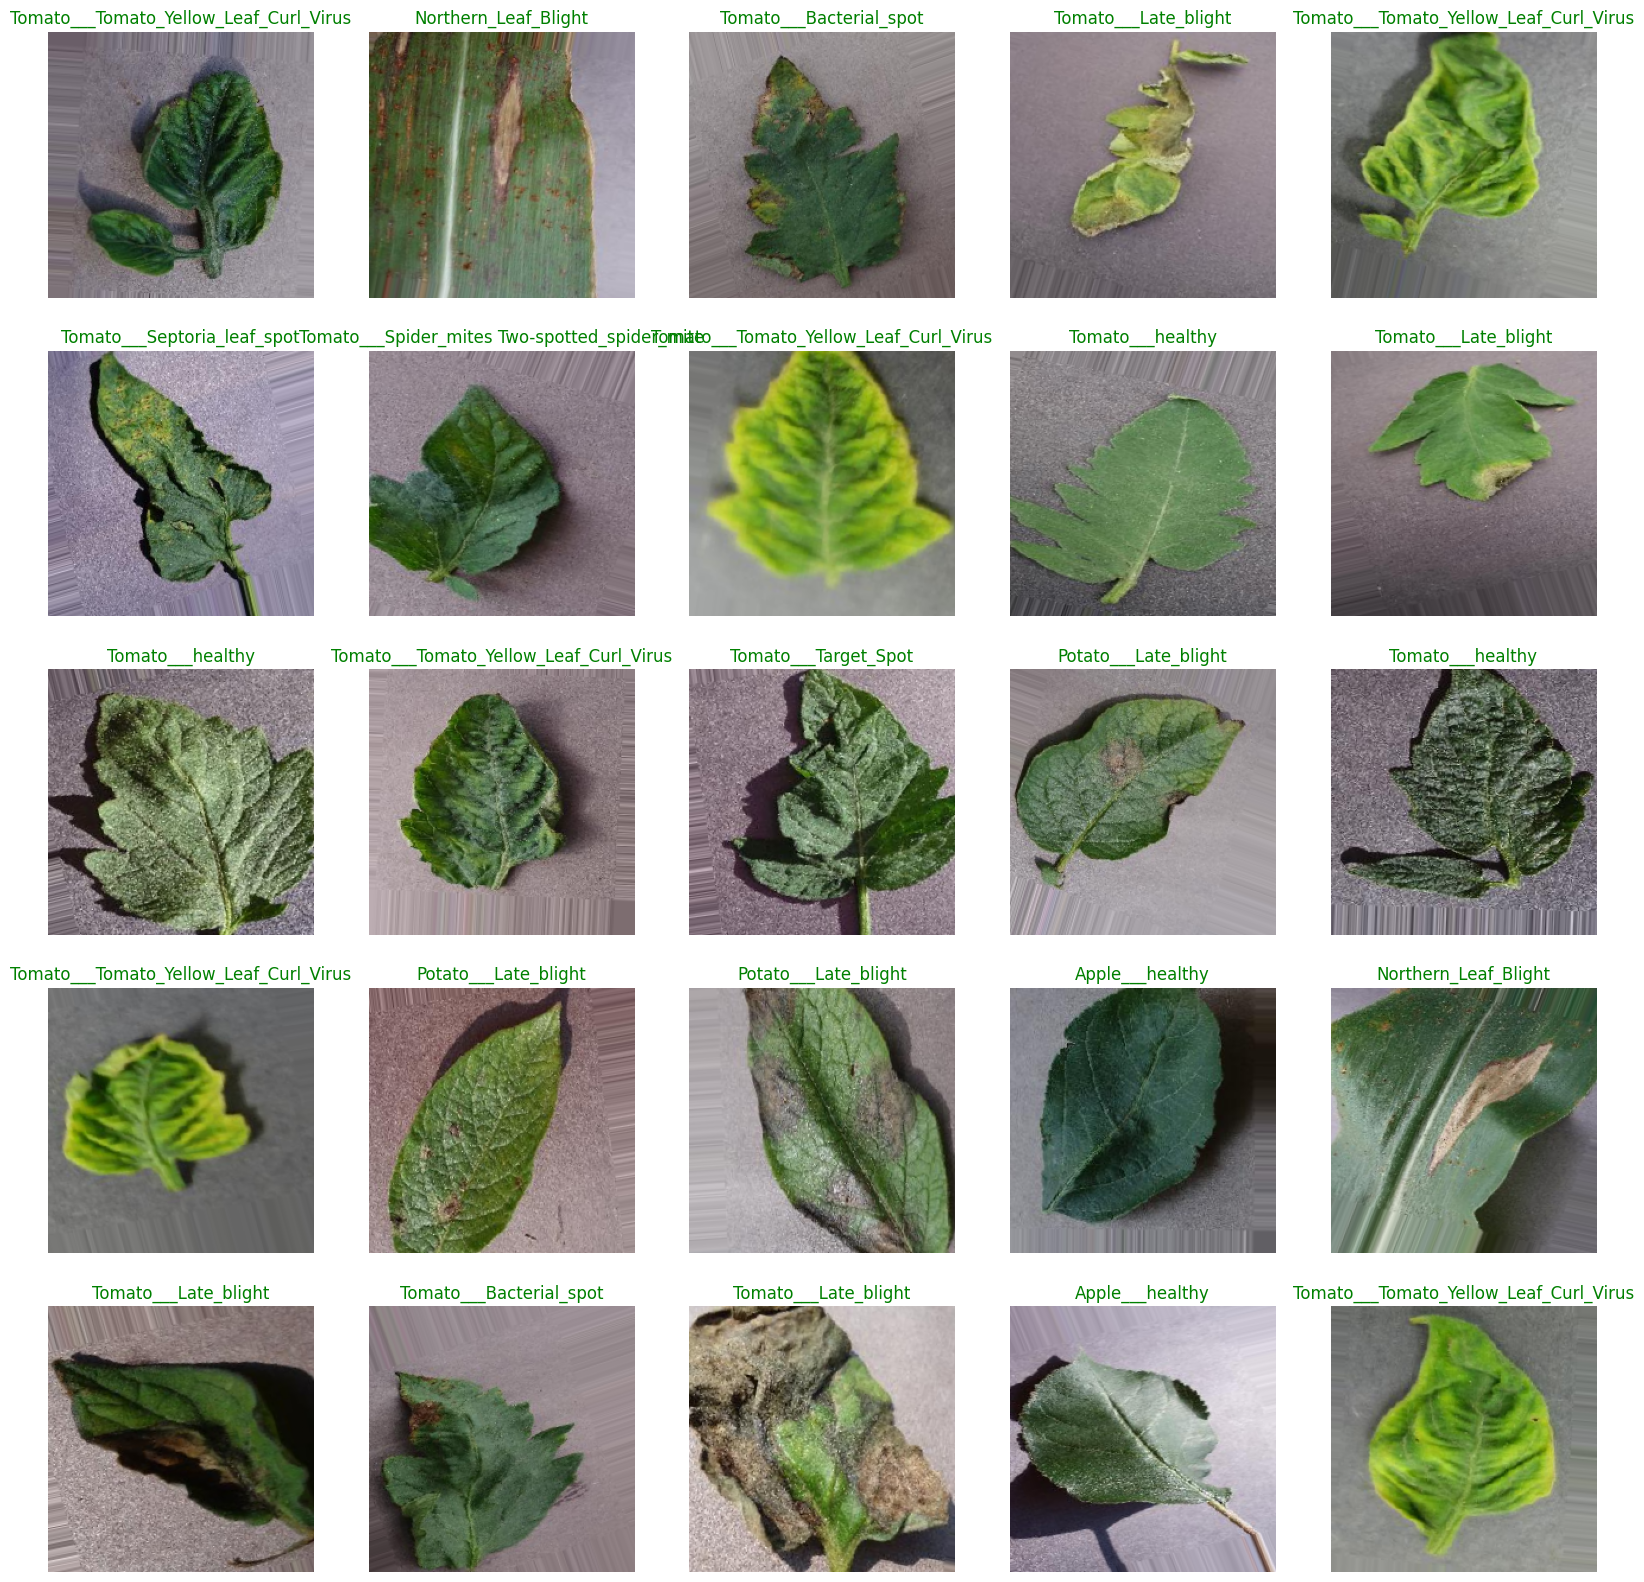

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(image_gen):
    class_dict = image_gen.class_indices
    classes = list(class_dict.keys())
    
    images, labels = next(image_gen)
    
    plt.figure(figsize=(20, 20))
    
    num_images = min(len(labels), 25)
    
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        
        image = images[i]
        
        plt.imshow(image)
        
        index = np.argmax(labels[i])
        class_name = classes[index]
        
        plt.title(class_name, color="green", fontsize=12)
        plt.axis('off')
    
    plt.show()

show_images(train_generator)

In [12]:
input_shape = (224, 224, 3)  
n_classes = len(train_generator.class_indices)

model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(7, 7), strides=(3, 3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPool2D(pool_size=(3, 3)),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),


    keras.layers.Dense(n_classes, activation='softmax')
])


model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 73, 73, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │         5,397 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,253,141 (4.78 MB)

 Trainable params: 1,253,141 (4.78 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',  # Path to save the model
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode='min',  # Save the model with the minimum validation loss
    verbose=1  # Verbosity mode
)

In [15]:
history = model.fit(
    train_generator,
    batch_size=32,
    validation_data=valid_generator,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint] 
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


598/598 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.2688 - loss: 2.4498
Epoch 1: val_loss improved from inf to 1.44210, saving model to best_model.keras
598/598 ━━━━━━━━━━━━━━━━━━━━ 413s 680ms/step - accuracy: 0.2689 - loss: 2.4492 - val_accuracy: 0.5486 - val_loss: 1.4421
Epoch 2/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.5877 - loss: 1.2814
Epoch 2: val_loss improved from 1.44210 to 0.86327, saving model to best_model.keras
598/598 ━━━━━━━━━━━━━━━━━━━━ 400s 664ms/step - accuracy: 0.5878 - loss: 1.2812 - val_accuracy: 0.7078 - val_loss: 0.8633
Epoch 3/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.7053 - loss: 0.9132
Epoch 3: val_loss improved from 0.86327 to 0.66398, saving model to best_model.keras
598/598 ━━━━━━━━━━━━━━━━━━━━ 420s 698ms/step - accuracy: 0.7053 - loss: 0.9131 - val_accuracy: 0.7714 - val_loss: 0.6640
Epoch 4/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.7745 - loss: 0.6902
Epoch 4: val_loss improved from 0.66398 to 0.

In [16]:
scores = model.evaluate(test_generator)
scores

171/171 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - accuracy: 0.9459 - loss: 0.1553


[0.14695003628730774, 0.9482348561286926]

171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step


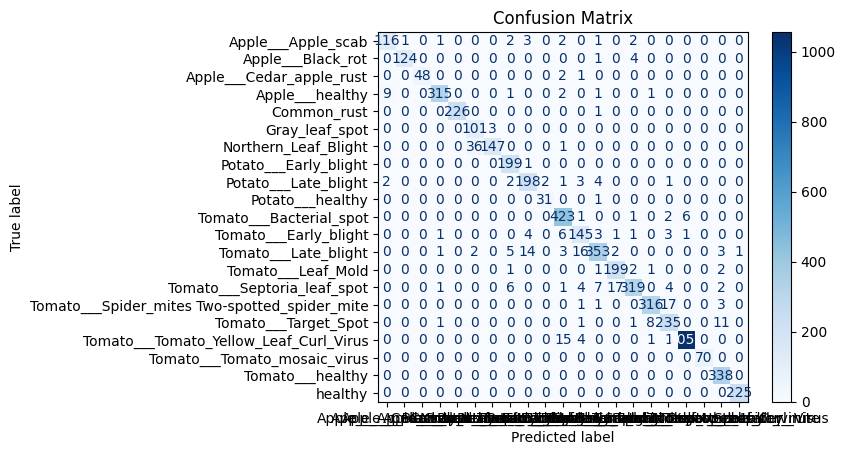

In [17]:
predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

cm = confusion_matrix(true_classes, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [18]:
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step


In [19]:
true_classes = test_generator.classes

In [20]:
from sklearn.metrics import classification_report  

class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.91      0.91      0.91       128
                            Apple___Black_rot       0.99      0.96      0.98       129
                     Apple___Cedar_apple_rust       1.00      0.94      0.97        51
                              Apple___healthy       0.98      0.96      0.97       329
                                  Common_rust       1.00      1.00      1.00       227
                               Gray_leaf_spot       0.73      0.97      0.83       104
                         Northern_Leaf_Blight       0.98      0.80      0.88       184
                        Potato___Early_blight       0.92      0.99      0.96       200
                         Potato___Late_blight       0.90      0.93      0.91       213
                             Potato___healthy       0.94      0.97      0.95        32
                      Tomato___Bacterial_s

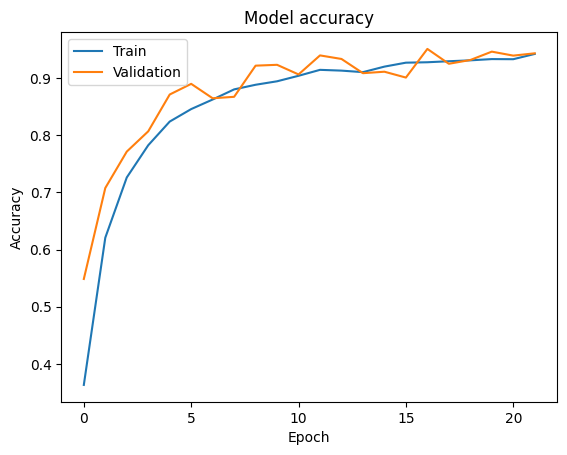

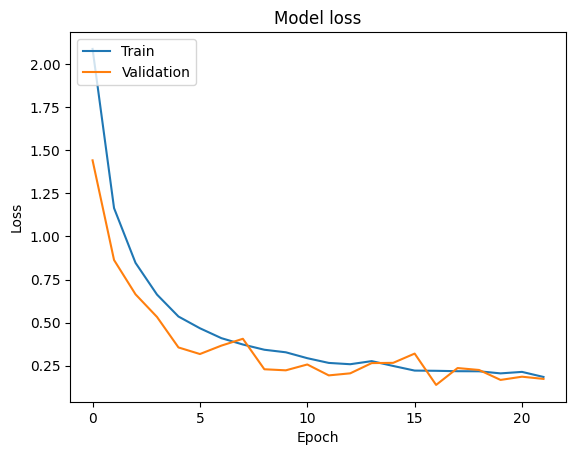

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
import numpy as np

class_names = list(test_generator.class_indices.keys())

images_batch, labels_batch = next(test_generator)

first_image = images_batch[0]
first_label = np.argmax(labels_batch[0])  

batch_prediction = model.predict(images_batch)
predicted_label_index = np.argmax(batch_prediction[0])

print("Actual label:", class_names[first_label])
print("Predicted label:", class_names[predicted_label_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Actual label: Potato___Late_blight
Predicted label: Potato___Late_blight


In [23]:
import tensorflow as tf
import numpy as np

def predict(model, img, class_names):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

class_names = list(test_generator.class_indices.keys())

images_batch, labels_batch = next(test_generator)
for i in range(min(len(images_batch), 9)):
    predicted_class, confidence = predict(model, images_batch[i], class_names)
    actual_class = class_names[np.argmax(labels_batch[i])]

    print(f"Actual: {actual_class}, Predicted: {predicted_class}, Confidence: {confidence}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Actual: Northern_Leaf_Blight, Predicted: Northern_Leaf_Blight, Confidence: 99.76%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Actual: Apple___Apple_scab, Predicted: Apple___Apple_scab, Confidence: 100.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Actual: Tomato___Spider_mites Two-spotted_spider_mite, Predicted: Tomato___Spider_mites Two-spotted_spider_mite, Confidence: 99.72%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Actual: Apple___Apple_scab, Predicted: Apple___Apple_scab, Confidence: 99.26%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Actual: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Confidence: 100.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Actual: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus, Confidence: 100.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Actual: Northern_Leaf_Blight, Predicted: Northern_Leaf_Blight, Confidence: 99.53%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Actual:

In [24]:
model.save("Model_P_v8.h5")

## Addditional Models

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

# Extract data and labels from generators
def extract_data_from_generator(generator):
    images, labels = [], []
    for i in range(len(generator)):
        batch = generator[i]
        images.extend(batch[0])
        labels.extend(batch[1])
    return np.array(images), np.array(labels)

X_train, y_train = extract_data_from_generator(train_generator)
X_test, y_test = extract_data_from_generator(test_generator)

# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Convert one-hot encoded labels to class indices
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Train logistic regression model
lr_model = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_model.fit(X_train_scaled, y_train_classes)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)

# Print classification report
print("Logistic Regression Results:")
print(classification_report(y_test_classes, lr_pred, target_names=classes))